In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('../../setup/matplotlib_style/standard_plot_style.mplstyle')

In [2]:
data_excited = xr.open_dataset("/mnt/c/Users/johan/OneDrive/Skrivebord/Master_Thesis/data/spam_seperation/demodulated_excited.nc")
data_ground   = xr.open_dataset("/mnt/c/Users/johan/OneDrive/Skrivebord/Master_Thesis/data/spam_seperation/demodulated_ground.nc")

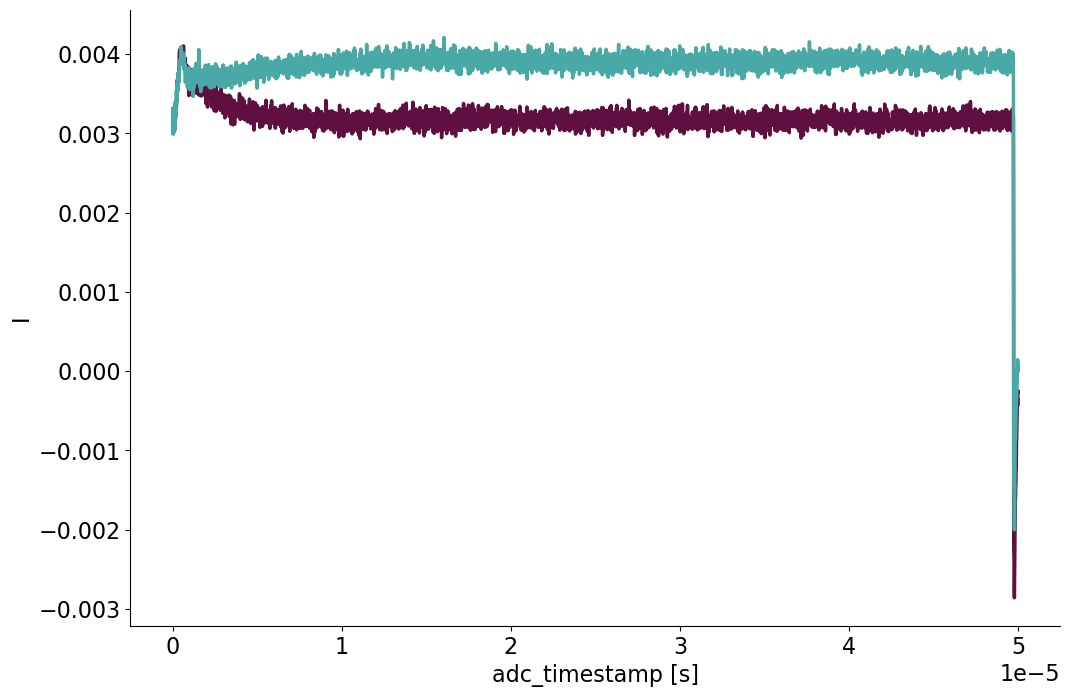

In [3]:
data_ground.mean("sample").I.plot()
data_excited.mean("sample").I.plot()

# plt.xlim(0, 5e-6)

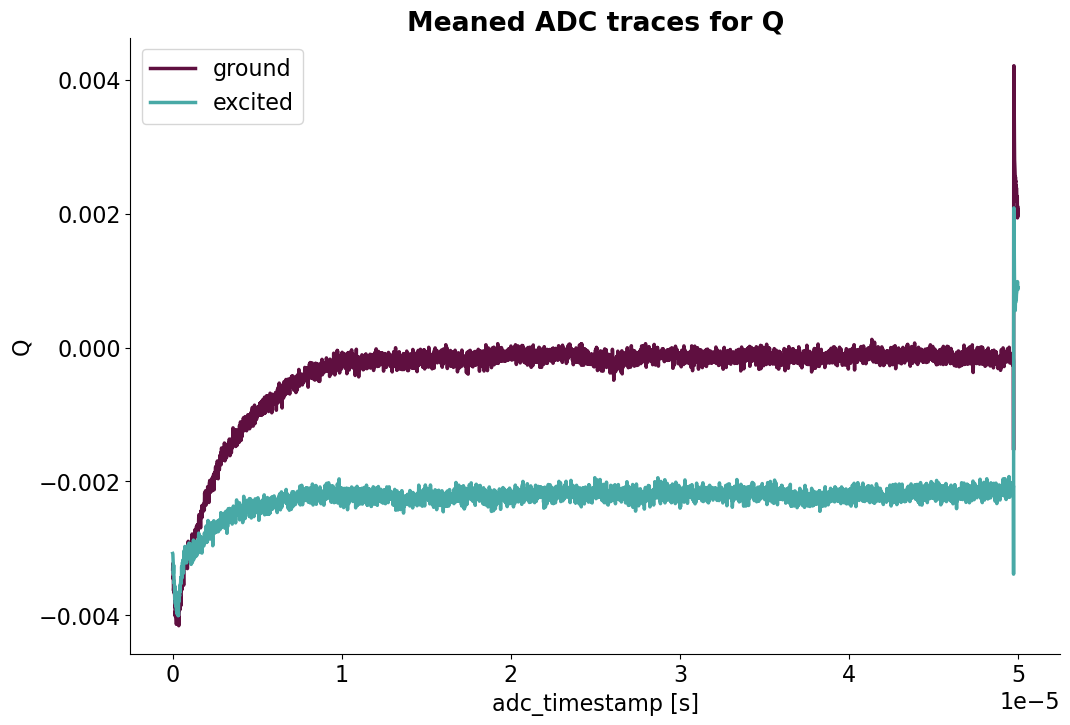

In [4]:
data_ground.mean("sample").Q.plot(label = "ground")
data_excited.mean("sample").Q.plot(label = "excited")

plt.title("Meaned ADC traces for Q")
plt.legend()


# plt.xlim(0, 5e-6)

In [5]:
summed_ground = data_ground.sel(adc_timestamp=slice(0, 50e-6)).mean("adc_timestamp")
summmed_excited = data_excited.sel(adc_timestamp=slice(0, 50e-6)).mean("adc_timestamp")

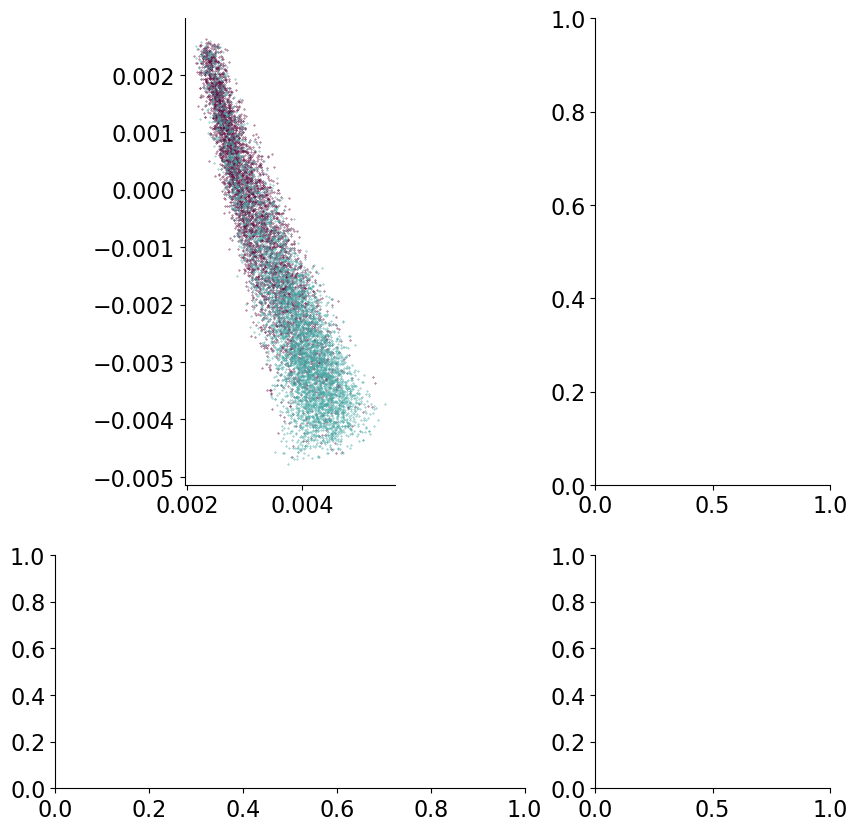

In [6]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, gridspec_kw={"width_ratios": [1, 1/2], "height_ratios": [1, 1 / 2]}, figsize=(10, 10))

ax[0, 0].scatter(summed_ground.I, summed_ground.Q, s=0.1)
ax[0, 0].scatter(summmed_excited.I, summmed_excited.Q, s=0.1)

ax[0, 0].set_aspect("equal")

In [7]:
def get_data_from_time_slice(data, time_slice):
    return data.sel(adc_timestamp=slice(time_slice[0] * 1e-6, time_slice[1]*1e-6)).mean("adc_timestamp")


from ipywidgets import interactive

def plot_data(start_time):
    end_time = start_time + 2

    # Get ground
    I_ground = get_data_from_time_slice(data_ground.I, (start_time, end_time))
    Q_ground = get_data_from_time_slice(data_ground.Q, (start_time, end_time))

    # for excited
    I_excited = get_data_from_time_slice(data_excited.I, (start_time, end_time))
    Q_excited = get_data_from_time_slice(data_excited.Q, (start_time, end_time))

    fig, axes = plt.subplots(ncols = 2)
    ax = axes[0]
    ax.scatter(I_ground, Q_ground, s=0.1)
    ax.scatter(I_excited, Q_excited, s=0.1)
    ax.set_aspect("equal")

    ax.set(
        title = f"Meaned ADC traces for Q, start time: {start_time} us to {end_time} us",
        xlabel = "I",
        ylabel = "Q",
    )

    ax = axes[1]
    ax.hist(Q_ground, bins=100, alpha=0.5, label="ground", orientation="horizontal")
    ax.hist(Q_excited, bins=100, alpha=0.5, label="excited", orientation="horizontal")

interactive_plot = interactive(plot_data, start_time=(0., 49., 1.)) #, end_time=(0., 50., 1.))

interactive_plot

interactive(children=(FloatSlider(value=24.0, description='start_time', max=49.0, step=1.0), Output()), _dom_c…

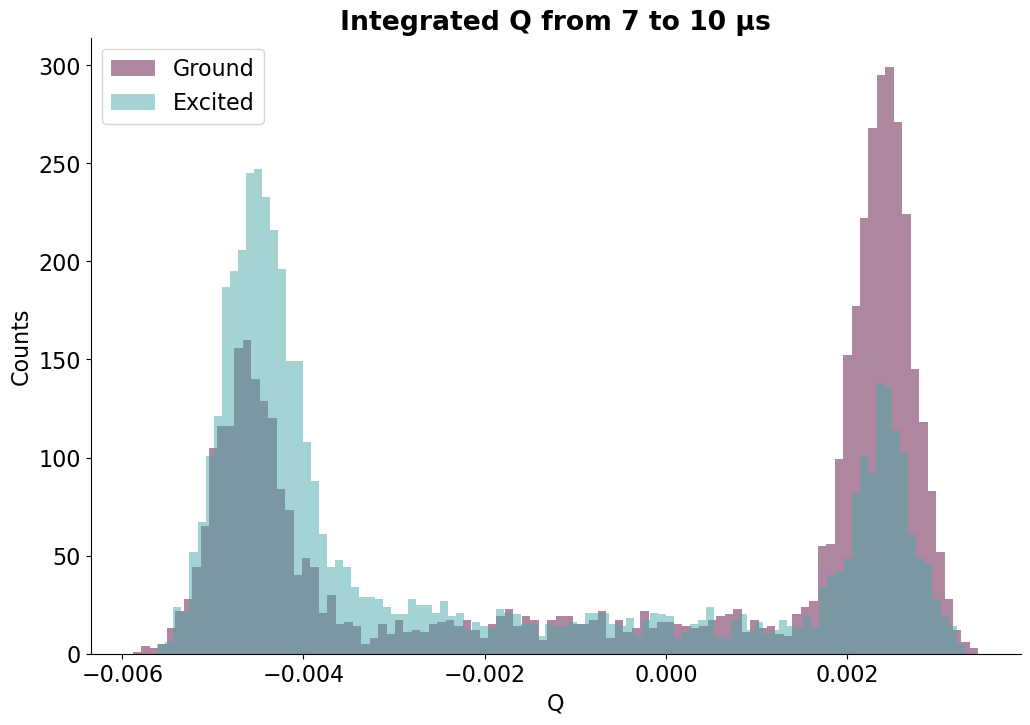

In [8]:
fig, ax = plt.subplots()

start, end = 7, 10

ground_sum =  get_data_from_time_slice(data_ground.Q, (start, end)).values
excited_sum = get_data_from_time_slice(data_excited.Q, (start, end)).values

ax.hist(ground_sum, bins=100, alpha=0.5, label="Ground")
ax.hist(excited_sum, bins=100, alpha=0.5, label="Excited");

from sklearn.metrics import confusion_matrix

targets = np.concatenate((np.zeros(len(ground_sum)), np.ones(len(excited_sum))))
predictions = np.concatenate((ground_sum, excited_sum))
confusion_matrix(targets, predictions < 0 )

ax.set(
    xlabel="Q",
    ylabel="Counts",
    title = f"Integrated Q from {start} to {end} µs"
)

ax.legend()

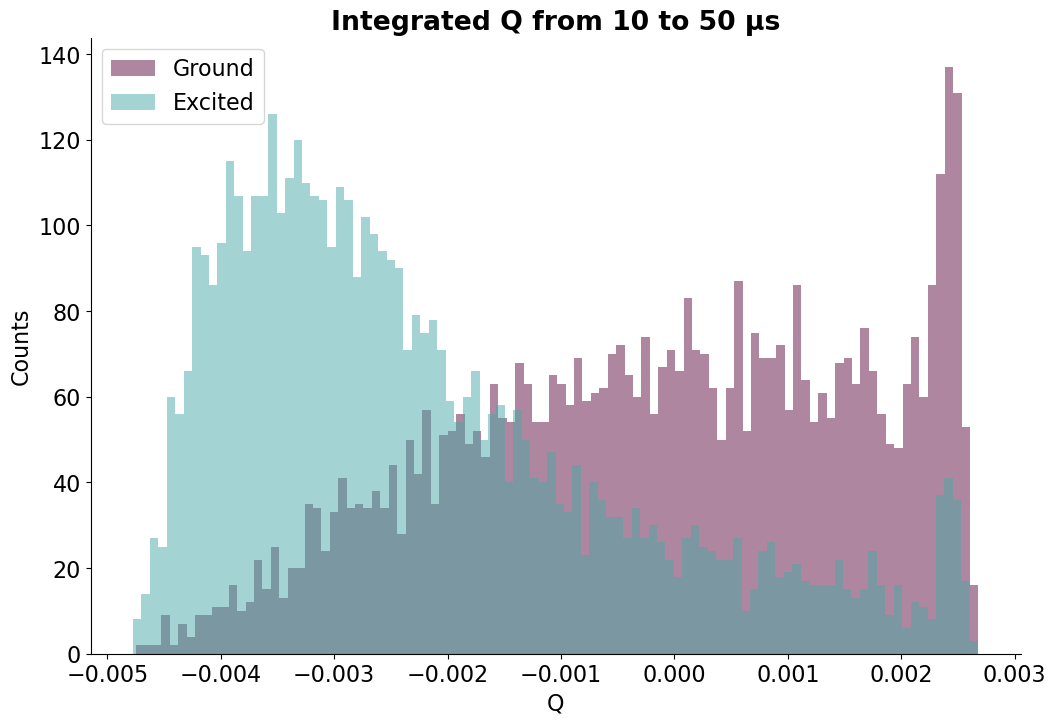

In [9]:
fig, ax = plt.subplots()

start, end = 10, 50

ground_sum =  get_data_from_time_slice(data_ground.Q, (start, end)).values
excited_sum = get_data_from_time_slice(data_excited.Q, (start, end)).values

ax.hist(ground_sum, bins=100, alpha=0.5, label="Ground")
ax.hist(excited_sum, bins=100, alpha=0.5, label="Excited");

from sklearn.metrics import confusion_matrix

targets = np.concatenate((np.zeros(len(ground_sum)), np.ones(len(excited_sum))))
predictions = np.concatenate((ground_sum, excited_sum))
confusion_matrix(targets, predictions < 0 )

ax.set(
    xlabel="Q",
    ylabel="Counts",
    title = f"Integrated Q from {start} to {end} µs"
)

ax.legend()